# Project description

# A/B testing and analysis of results in a big online store


You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.


# Description of the data

##### Data used in the first part of the project

/datasets/hypotheses_us.csv

    * Hypotheses — brief descriptions of the hypotheses
    * Reach — user reach, on a scale of one to ten
    * Impact — impact on users, on a scale of one to ten
    * Confidence — confidence in the hypothesis, on a scale of one to ten
    * Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.


##### Data used in the second part of the project

/datasets/orders_us.csv 

    * transactionId — order identifier
    * visitorId — identifier of the user who placed the order
    * date — of the order
    * revenue — from the order
    * group — the A/B test group that the user belongs to

/datasets/visits_us.csv

    * date — date
    * group — A/B test group
    * visits — the number of visits on the date specified in the A/B test group specified

# Initialization

# Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    hypotheses = pd.read_csv('/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
except:    
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
finally:
    print('Try to read files')
       
hypotheses.head()

Try to read files


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


# Part 1. Prioritizing Hypotheses


The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.


 The task is to:
 
   * Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority. 
   * Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority. 
   * Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


In [3]:
# To know the number of columns and rows in the DataFrame
hypotheses.shape

(9, 5)

In [4]:
# Get information about the DataFrame
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [5]:
# To check whether column's name are written in appropriate way
hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [6]:
# To convert the columns' names into lower case
hypotheses.columns= hypotheses.columns.str.strip().str.lower()

In [7]:
# To confirm if the columns' names are converted into the lower case
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [8]:
# To get information about statistical character of the DataFrame
hypotheses.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [9]:
# Checking duplicates in the DataFrame
hypotheses.duplicated().sum()

0

In [10]:
# To confirm the missing values of the DataFrame
hypotheses.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [11]:
# To get the percentile information of the columns in the dataframe
hypotheses.isnull().sum()*100/len(visits)

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
effort        0.0
dtype: float64

In [12]:
# Print a sample of DataFrame for gamess
pd.options.display.max_colwidth = 210
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [13]:
# To print the whole information of the DataFrame
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


##### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [14]:
# To print the whole information of the DataFrame
pd.options.display.max_colwidth = 60
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will b...,3,10,8,6
1,Launch your own delivery service. This will shorten deli...,2,5,4,10
2,Add product recommendation blocks to the store's site. T...,8,3,7,3
3,Change the category structure. This will increase conver...,8,3,3,8
4,Change the background color on the main page. This will ...,3,1,1,1
5,Add a customer review page. This will increase the numbe...,3,2,2,3
6,Show banners with current offers and sales on the main p...,5,3,8,3
7,Add a subscription form to all the main pages. This will...,10,7,8,5
8,Launch a promotion that gives users discounts on their b...,1,9,9,5


ICE score = (impact * confidence) / effort

In [15]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print(hypotheses[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False).round(2))


                                                    hypothesis    ICE
8  Launch a promotion that gives users discounts on their b...  16.20
0  Add two new channels for attracting traffic. This will b...  13.33
7  Add a subscription form to all the main pages. This will...  11.20
6  Show banners with current offers and sales on the main p...   8.00
2  Add product recommendation blocks to the store's site. T...   7.00
1  Launch your own delivery service. This will shorten deli...   2.00
5  Add a customer review page. This will increase the numbe...   1.33
3  Change the category structure. This will increase conver...   1.12
4  Change the background color on the main page. This will ...   1.00


##### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

RICE score = (reach * impact * confidence) / effort

In [16]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

print(hypotheses[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending=False))


                                                    hypothesis   RICE
7  Add a subscription form to all the main pages. This will...  112.0
2  Add product recommendation blocks to the store's site. T...   56.0
0  Add two new channels for attracting traffic. This will b...   40.0
6  Show banners with current offers and sales on the main p...   40.0
8  Launch a promotion that gives users discounts on their b...   16.2
3  Change the category structure. This will increase conver...    9.0
1  Launch your own delivery service. This will shorten deli...    4.0
5  Add a customer review page. This will increase the numbe...    4.0
4  Change the background color on the main page. This will ...    3.0


##### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


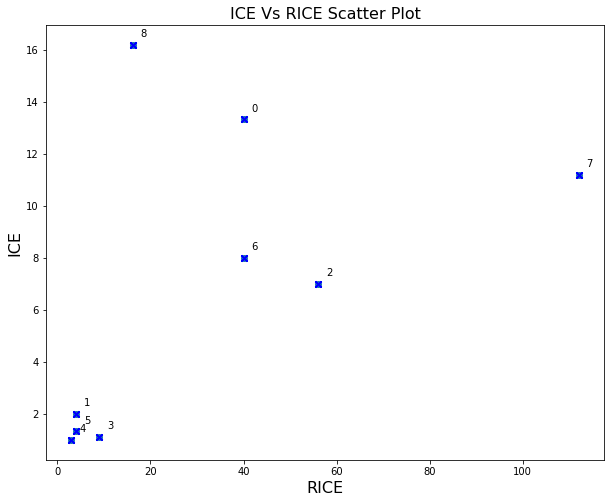

In [17]:
x = hypotheses['RICE'].values
y = hypotheses['ICE'].values
types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)

ax.set_xlabel('RICE', fontsize=16)
ax.set_ylabel('ICE', fontsize=16)
ax.set_title('ICE Vs RICE Scatter Plot', fontsize=16)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(8,8), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')

##### Conclusion

 * The hypotheses DataFrame has 9 rows and 5 columns. It has object and int data types.
 * It is confirmed that the DataFrame hypotheses has no duplicates and missing values.
 * The columns of the hypotheses DataFrame converted into lower cases.
 * The first four hypotheses with the highest ICE score are 8, 0, 7 and 6 with values 16.20, 13.33, 11.20 and 8.00 respectively. And the hypotheses with the least ICE score is 4 and it has a score value of 1.
 * The first four hypotheses with the highest RICE score are 7, 2, 0 and 6 with values 112.0, 56.0, 40.0 and 40.0  respectively. And the hypotheses with the least RICE score is 4 and it has a score value of 3.
 * The prioritization of hypotheses changed when we use RICE instead of ICE.
 * Hypotheses 8, 0 and 7 have high scores in both ICE and RICE scores where as hypotheses 1, 3, 4 and 5 score low in both ICE and RICE scores.

In [18]:
# To know the number of columns and rows in the DataFrame
orders.shape

(1197, 5)

In [19]:
# Get information about the DataFrame
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [20]:
# Check data type of the DataFrame
orders.dtypes

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object

In [21]:
# Checking duplicates in the DataFrame
orders.duplicated().sum()

0

In [22]:
# To confirm the missing values of the DataFrame
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [23]:
# To get the percentile information of the columns in the dataframe
orders.isnull().sum()*100/len(visits)

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [24]:
# To get information about statistical character of the DataFrame
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [25]:
# Print a sample of DataFrame for gamess
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [26]:
# To know the number of columns and rows in the DataFrame
visits.shape

(62, 3)

In [27]:
# Get information about the DataFrame
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [28]:
# Check data type of the DataFrame
visits.dtypes

date      object
group     object
visits     int64
dtype: object

In [29]:
# To get information about statistical character of the DataFrame
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [30]:
# Checking duplicates in the DataFrame
visits.duplicated().sum()

0

In [31]:
# To confirm the missing values of the DataFrame
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [32]:
# To get the percentile information of the columns in the dataframe
visits.isnull().sum()*100/len(visits)

date      0.0
group     0.0
visits    0.0
dtype: float64

In [33]:
# Print a sample of DataFrame for gamess
visits.sample(10)

,date,group,visits
33,2019-08-03,B,509
44,2019-08-14,B,746
26,2019-08-27,A,711
28,2019-08-29,A,577
34,2019-08-04,B,770
11,2019-08-12,A,595
2,2019-08-03,A,507
39,2019-08-09,B,610
25,2019-08-26,A,722
42,2019-08-12,B,543


##### COnclusion

 * The orders DataFrame has 1197 rows and 5 columns. It has int64, object and float64 data types.
 * The visits DataFrame has 64 rows and 3 columns. It has int64 and object data types.
 * It has been confirmed that the orders and visits DataFrames have no duplicates and missing values.
 * The data type of date in both orders and visits needs to be converted into the right data type. 
 

# Data Preprocessing

In [34]:
# To convert data type from object into datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [35]:
# To convert data type from object into datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [36]:
# To confirm if the data type is converted
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


In [37]:
# To confirm if the data type is converted
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


In [38]:
# To check if there are unique values
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [39]:
# To check if there are unique values
visits['visits'].unique()

array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531])

In [40]:
# To check if there are unique values
visits['group'].unique()

array(['A', 'B'], dtype=object)

##### Conclusion

 * There are only two groups 'A' and 'B'.
 * It is confirmed that the date data type is converted into the right data type.

# Part 2. A/B Test Analysis

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.


##### Task

Analyze the A/B test:

 1. Graph cumulative revenue by group. Make conclusions and conjectures.
 2. Graph cumulative average order size by group. Make conclusions and conjectures.
 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
 7. Plot a scatter chart of order prices. Make conclusions and conjectures.
 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
 13. Make a decision based on the test results. The possible decisions are: 
           1. Stop the test, consider one of the groups the leader. 
           2. Stop the test, conclude that there is no difference between the groups. 
           3. Continue the test.


#####  1. Graph cumulative revenue by group

In [41]:
# The DataFrame
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [42]:
# The DataFrame
visits.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [43]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(10)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
85,2019-08-22,B
86,2019-08-22,A
124,2019-08-17,A
125,2019-08-17,B


In [44]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], 
                       orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : pd.Series.nunique, 
          'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

ordersAggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
310,2019-08-03,B,61,59,6050.6
499,2019-08-04,A,84,77,6822.1
498,2019-08-04,B,78,75,7767.9
698,2019-08-05,A,109,100,8810.2
699,2019-08-05,B,101,98,9262.9


In [45]:
# getting aggregated cumulative daily data on visitors  
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(visits['date'] <= x['date'], 
                       visits['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'visits' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

visitsAggregated.head(10)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [46]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845
5 2019-08-03     B      61      59   6050.6      1803
6 2019-08-04     A      84      77   6822.1      2562
7 2019-08-04     B      78      75   7767.9      2573
8 2019-08-05     A     109     100   8810.2      3318
9 2019-08-05     B     101      98   9262.9      3280


Creating cumulativeRevenueA and cumulativeRevenueB

In [47]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head(10)

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109
10,2019-08-06,9600.0,127
12,2019-08-07,11842.9,145
14,2019-08-08,13373.3,161
16,2019-08-09,16320.4,177
18,2019-08-10,19608.6,193


In [48]:
# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head(10)

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101
11,2019-08-06,13069.3,129
13,2019-08-07,16600.8,153
15,2019-08-08,20088.6,180
17,2019-08-09,22646.7,205
19,2019-08-10,24367.1,228


Plot cumulative revenue graphs by day and A/B test group

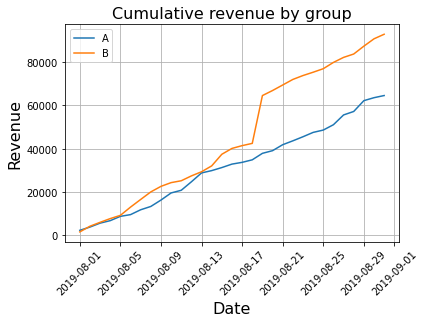

In [49]:
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.rcParams["figure.figsize"] = (15,6)
plt.grid()
plt.xticks(rotation = 45)
plt.title('Cumulative revenue by group', fontdict={"size":16})
plt.ylabel('Revenue', fontdict={"size":16})
plt.xlabel('Date', fontdict={"size":16})
plt.legend()
plt.show()

Revenue of the test (B) is rising steadily for certain weeks, but around Agust 17, 2019 it shows sharp increase and later shows constant increase, which is a good sign. The revenue of the controled one (A) is rising steadily throughout the end. 
However, we can see that both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

##### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

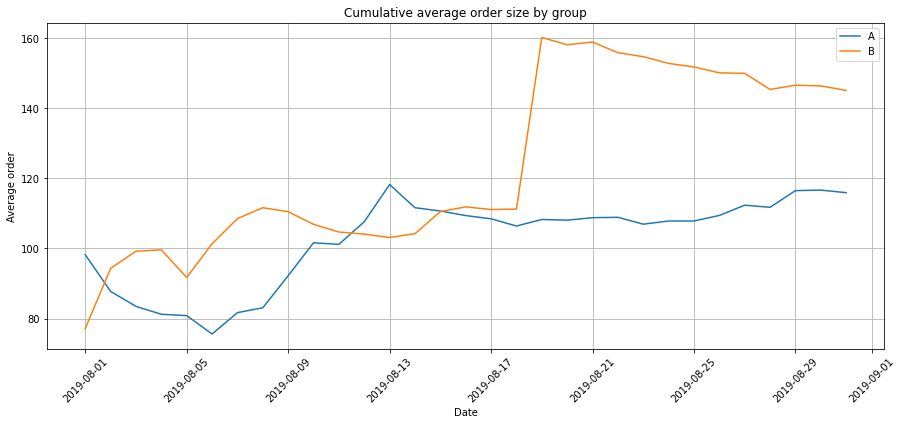

In [50]:
#  Plot average purchase size by group, that is divide cumulative revenue by the cumulative number of orders:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.xticks(rotation = 45)
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Cumulative average order size by group')
plt.ylabel('Average order')
plt.xlabel('Date')
plt.legend()
plt.show()

The average purchase size of both A and B fluctuates a lot before August 17, 2019. After August 17, 2019, Group A looks increase slowly, where as Group B on  August 17, 2019 shows sharp jump on its value and started to decrease slowly to wards the end of the test. Most of the time Group B was above the controlled group (Group A).  

From the graph it is seen that both groups see spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

##### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

To plot a relative difference graph for the average purchase sizes. We'll add a horizontal axis with the axhline() method (i.e. horizontal line across the axis):

In [51]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101
5,2019-08-06,9600.0,127,13069.3,129
6,2019-08-07,11842.9,145,16600.8,153
7,2019-08-08,13373.3,161,20088.6,180
8,2019-08-09,16320.4,177,22646.7,205
9,2019-08-10,19608.6,193,24367.1,228


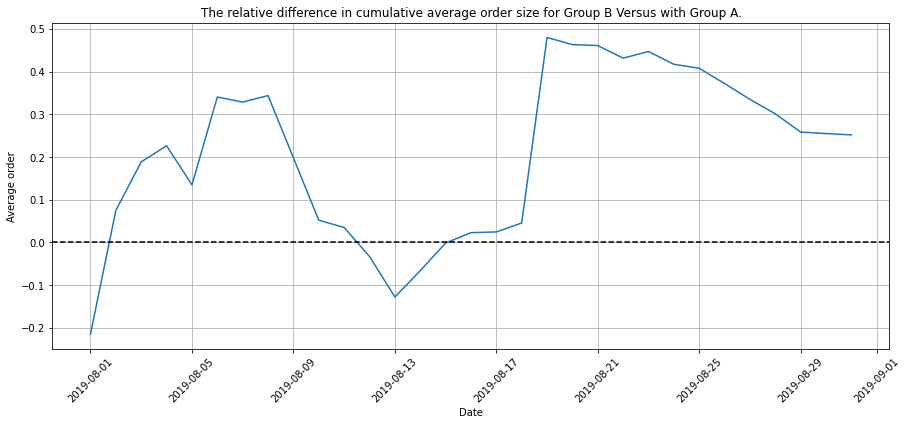

In [52]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis

plt.grid()
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.rcParams["figure.figsize"] = (10,6)
plt.title('The relative difference in cumulative average order size for Group B Versus with Group A.')
plt.ylabel('Average order')
plt.xlabel('Date')

plt.show()

The Average order fluctuates with date many times. At several points the difference between the segments spikes. This means there must be some big orders or purchases and outliers.

##### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

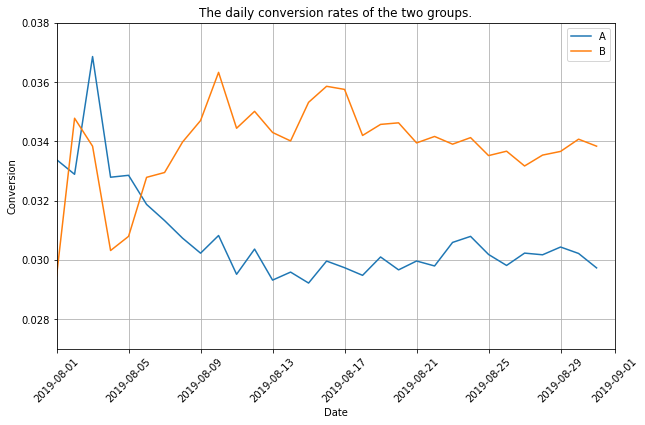

In [53]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Ploting the graph
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
 
plt.grid()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0.027, 0.038])
plt.xticks(rotation=45)
plt.title('The daily conversion rates of the two groups.')
plt.ylabel('Conversion')
plt.xlabel('Date')
plt.legend()
plt.show()

At the beginning of the test, Segment A had higher conversion rate but segiment B gradually gained and lead till the end of the test. The conversion rate of both segments flucatuate too much but after August 9, 2019 fluctuate less compared to the previous.   

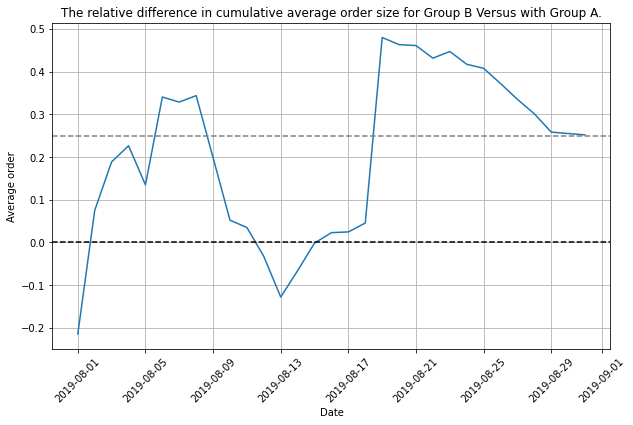

In [54]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis

plt.grid()
plt.xticks(rotation = 45)
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.rcParams["figure.figsize"] = (10,6)
plt.title('The relative difference in cumulative average order size for Group B Versus with Group A.')
plt.ylabel('Average order')
plt.xlabel('Date')

plt.axhline(y= 0.25, color='grey', linestyle='--')

plt.show()

The graph of the difference in average purchase size shows fluctuations, that is there were several sudden and consideable changes. It was this graph that allowed you to detect anomalies may be they have to do with abnormality large purchases. As a result we can't draw any definite conclusions from this graph. But, towards the last of the test it shows the graph starts to stabilize.

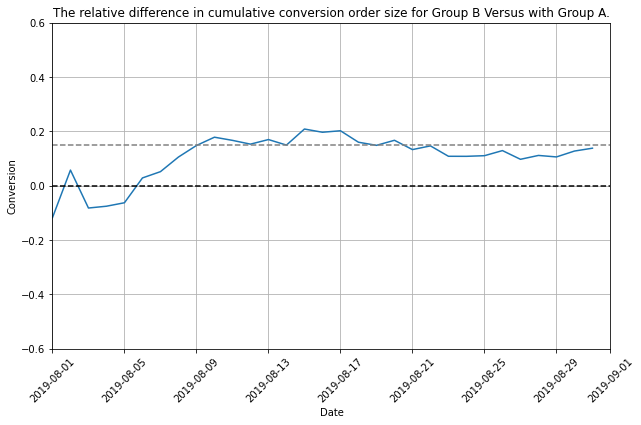

In [55]:
# plot a relative difference graph for the cumulative conversion rates
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.grid()
plt.xticks(rotation = 45)
plt.axhline(y= 0, color='black', linestyle='--')
plt.axhline(y= 0.15, color='grey', linestyle='--')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('The relative difference in cumulative conversion order size for Group B Versus with Group A.')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6]) 

plt.ylabel('Conversion')
plt.xlabel('Date')

plt.show()


The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around 0.15. This means group B was the leader in conversion rate almost from the very beginning. It gains steadily and stabilized 15% higher than group A. 

##### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [56]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [57]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by = 'orders', ascending = False).head(10))
 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


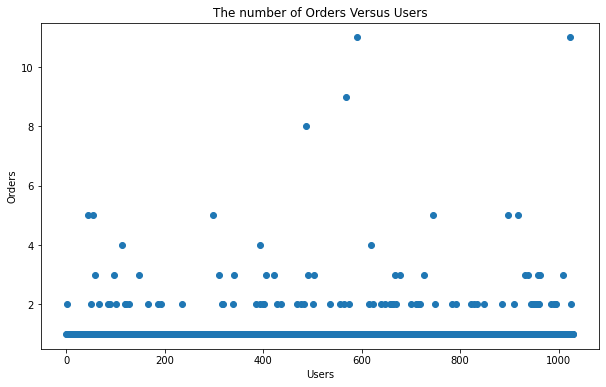

In [58]:
# Plot a scatter chart with the number of orders per user
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.rcParams["figure.figsize"] = (10,5)
plt.title('The number of Orders Versus Users')
plt.ylabel('Orders')
plt.xlabel('Users')

plt.show()

 It is confirmed that there are indeed a lot of users with more than two orders. It's not clear whether we should consider them anomalies or not.

##### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [59]:
# To calculate percentiles for the number of orders per user
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


No more than 5% of users placed more than 2 orders, and 1% of users made more than 4. Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies on that basis

##### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

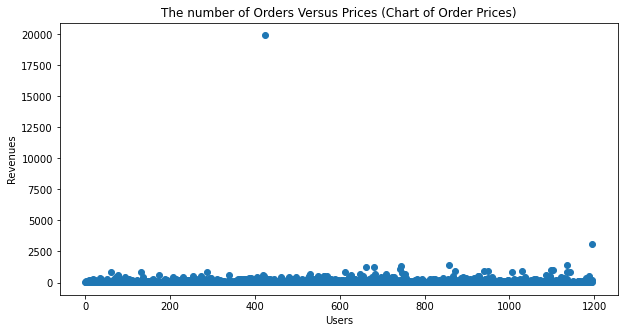

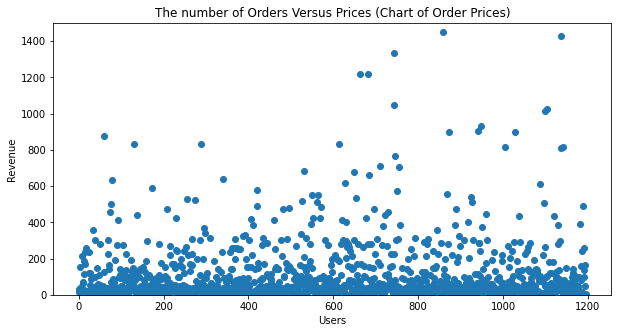

In [60]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.rcParams["figure.figsize"] = (10,5)
plt.title('The number of Orders Versus Prices (Chart of Order Prices)')
plt.ylabel('Revenues')
plt.xlabel('Users')

plt.show()


x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.rcParams["figure.figsize"] = (10,5)
plt.ylim(top = 1500, bottom = 0)
plt.title('The number of Orders Versus Prices (Chart of Order Prices)')
plt.ylabel('Revenue')
plt.xlabel('Users')

plt.show()

From the first graph there are only two orders between 2500 Dollars and 20,000 Dollars. These two orders definitely looks pretty anomalous.

From the second graph (after limiting the maximum and minimum values of the Y-axis), there are many orders between 400 and 1500 Dollars.

##### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [61]:
# Percentiles for order revenue per user using the np.percentile() method
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


No more than 5% of users placed orders that cost more than 436 Dollars. No more than 1% of users placed orders more than expensive than 901 Dollars. 

Filtering out 5% of the costs means values greater than 436 Dollars and filtering out 1% of the costs means values greater than 901 Dollars.

##### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

First Hypotheses should be created.

Hypotheses:

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Significance level (alpha) = 0.05

In [62]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [63]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [64]:
print('P_value: {0:.4f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative Conversion rate: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

P_value: 0.0168
Relative Conversion rate: 0.138


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%.

##### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

First Hypotheses should be created.

Hypotheses:

H0: There is no statistically significant difference in average order size between the groups

H1: There is statistically significant difference in average order size between the groups

Alpha = 0.05

In [65]:
# To calculate the statistical significance of the difference in the segments' average order size 
# between the groups using the raw data, we'll pass the data on revenue to the mannwhitneyu() criterion
print('P_value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Relative Conversion: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']
                       ['revenue'].mean()-1)) 


P_value: 0.692
Relative Conversion: 0.252


The p-value is constantly higher than 0.05, so there is no reason to reject the null hypothesis. It is concluded that there are no significant differences between the groups' average order size. Moreover, the relative difference gains 25.2%, this shows the average order size for group B is much greater than it is for group A.

##### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Hypotheses:

H0: There is no statistically significant difference in conversion between the groups.

H1: There is statistically significant difference in conversion between the groups.

Alpha = 0.05

In [66]:
# To find the total number of anomalous users using the shape() method
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithManyOrders.head(10)

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
Name: userId, dtype: int64

In [67]:
usersWithExpensiveOrders = orders[orders['revenue'] > 436]['visitorId']
usersWithExpensiveOrders 

60      4256040402
73      2947100995
77       787824685
78      3288820196
131     2254586615
137     1211585711
173     2953427180
208     3118156181
254     2686716486
273     2278620397
287     2254456485
339      834731816
420     1606766439
421     1357170471
425     1920142716
481     3177790019
496     3951559397
527     2837914161
530     2912540959
549     1367935136
562     1452540367
563      935349363
570     2247666522
613     3931967268
627     4120364173
648      382846391
654      816783716
662     4266935830
682     4266935830
684      358944393
697     2378935119
709      950626008
723     4009017467
728     3357398384
743     4133034833
744      888512513
746     3321013705
751      689129267
755     2279926127
858     1316129916
867     3372131337
873     4256040402
890     2853587382
925     2840985286
928      204675465
940     4003628586
949      887908475
960     2999642019
1006    2261934787
1029    2378935119
1087    3590655705
1096    3062433592
1099     148

In [68]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(10))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
684     358944393
648     382846391
1189    393266494
68      457167155
68      611059232
dtype: int64
(73,)


In [69]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [70]:
print("P_value: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative Conversion rate: {0:.5f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P_value: 0.01428
Relative Conversion rate: 0.17029


Based on the filtered data, there is significant difference between groups A and B. Since p-value < 0.05, there is enough evidence to reject the null hypothesis that there no statistically significant difference in conversion between the groups. Therefore, group B's relative gain of about 17.029% (17.03%). that is significant, that means group B is much better than group A.

##### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

Hypotheses:

H0: There is no statistically significant difference in average order size between the groups.

H1: There is statistically significant difference in average order size between the groups.

Alpha = 0.05

In [71]:
# the values for average order size
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.744
-0.028


The p_value is greater than 0.05. So we can't reject the null hypothesis because there's no significant difference in average order size between the groups. 

Based on the filtered data above, there is not a significant difference between groups A and B.

As it is observed from the result, there is a relative loss for group B by about 2.8%.

##### 13. Make a decision based on the test results. The possible decisions are: 
        1. Stop the test, consider one of the groups the leader. 
        2. Stop the test, conclude that there is no difference between the groups. 
        3. Continue the test.


   * There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data, that is 13.8% and 17.029% respectively.
   
   
     
   * The raw data shows a statistically significant difference between the groups in terms of average purchase size, that is 25.2% gain. However, after the anomalies were removed, it didn't show a statistically significant difference, that is 2.8% loss.
   
   
     
   * The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around 0.15. This means group B was the leader in conversion rate almost from the very beginning. It gains steadily and stabilized 15% higher than group A.
   
   
     
   * The graph of the difference in average purchase size shows fluctuations. It is very hard to draw any definite conclusions from this graph.
   
   


Based on the facts listed above, stop the test as group B is considered as a leader.


# Conclusion

* The hypotheses DataFrame has 9 rows and 5 columns. It has object and int data types.
* It is confirmed that the DataFrame hypotheses has no duplicates and missing values.
* The columns of the hypotheses DataFrame converted into lower cases.
* The first four hypotheses with the highest ICE score are 8, 0, 7 and 6 with values 16.20, 13.33, 11.20 and 8.00 respectively. And the hypotheses with the least ICE score is 4 and it has a score value of 1.
* The first four hypotheses with the highest RICE score are 7, 2, 0 and 6 with values 112.0, 56.0, 40.0 and 40.0  respectively. And the hypotheses with the least RICE score is 4 and it has a score value of 3.
* The prioritization of hypotheses changed when we use RICE instead of ICE.
* Hypotheses 8, 0 and 7 have high scores in both ICE and RICE scores where as hypotheses 1, 3, 4 and 5 score low in both ICE and RICE scores.
* The orders DataFrame has 1197 rows and 5 columns. It has int64, object and float64 data types.
* The visits DataFrame has 64 rows and 3 columns. It has int64 and object data types.
* It has been confirmed that the orders and visits DataFrames have no duplicates and missing values.
* The data type of date in both orders and visits needs to be converted into the right data type.
* In this project A/B Testing there are only two groups 'A' and 'B'.
* It is confirmed that the date data type is converted into the right data type.
* No more than 5% of users placed more than 2 orders, and 1% of users made more than 4. Thus, it would be reasonable to set two orders per user as the lower limit for the number of orders and to filter anomalies on that basis.
* No more than 5% of users placed orders that cost more than 436 Dollars. No more than 1% of users placed orders more than expensive than 901 Dollars. 
* Filtering out 5% of the costs means values greater than 436 Dollars and filtering out 1% of the costs means values greater than 901 Dollars.
* The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13.8%.
* The relative difference gains 25.2%, this shows the average order size for group B is much greater than it is for group A.
* There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data, that is 13.8% and 17.029% respectively.
   
* The raw data shows a statistically significant difference between the groups in terms of average purchase size, that is 25.2% gain. However, after the anomalies were removed, it didn't show a statistically significant difference, that is 2.8% loss.
* The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around 0.15. This means group B was the leader in conversion rate almost from the very beginning. It gains steadily and stabilized 15% higher than group A.
   
* The graph of the difference in average purchase size shows fluctuations. It is very hard to draw any definite conclusions from this graph.

   
Based on the facts listed above, stop the test as group B is considered as a leader.
